# Imports

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Convergence Tets

## Varying Ecut

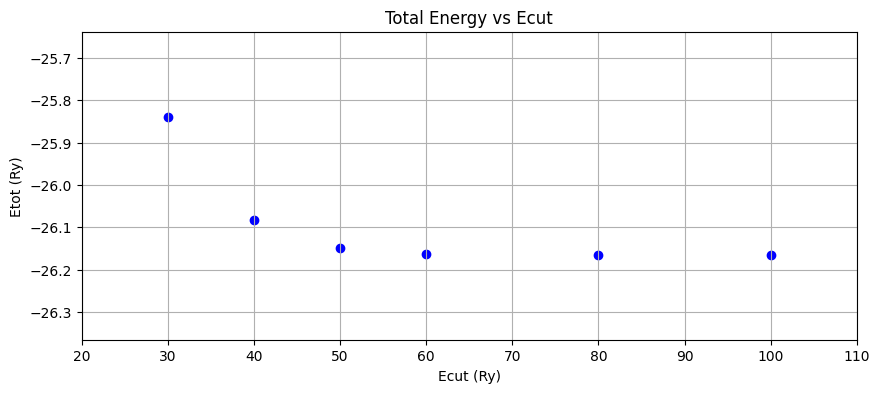

In [35]:
# Read the data from prefix.scf.ecut.out
kk, etot = [], []

with open('LiB2.scf.ecut.out', 'r') as file:
    for line in file:
        e, t = line.split(" ")
        kk.append(int(e.split(".")[2].split("-")[1]))
        etot.append(float(t))

kk, etot = zip(*sorted(zip(kk, etot)))


# Plotting
plt.figure(figsize=(10, 4))
plt.title('Total Energy vs Ecut')
plt.scatter(kk, etot, marker='o', linestyle='-', color='b')

plt.xlabel('Ecut (Ry)')
plt.ylabel('Etot (Ry)')
plt.grid(True)

plt.xlim(min(kk) - 10, max(kk) + 10)
plt.ylim(min(etot) - 0.2, max(etot) + 0.2)

plt.savefig('LiB2.scf.ecut.png')
plt.show()

## Convergence on Ecut

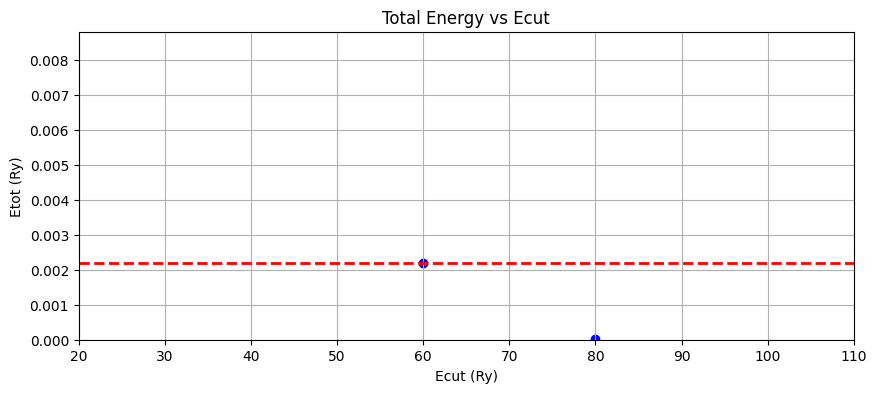

In [36]:
# Calculate Energy Differences
edelta = [abs(etot[i+1] - etot[i]) for i in range(len(kk) - 1)]

# Target energy
etarget = 0.0007349859 * 3

# Plotting
plt.figure(figsize=(10, 4))
plt.title('Total Energy vs Ecut')
plt.scatter(kk[:-1], edelta, marker='o', linestyle='-', color='b')

plt.xlabel('Ecut (Ry)')
plt.ylabel('Etot (Ry)')
plt.grid(True)

plt.xlim(min(kk) - 10, max(kk) + 10)
plt.ylim(0, 4 * etarget)

plt.axhline(y=etarget, color='r', linestyle='--', linewidth=2)

plt.savefig('LiB2.scf.ecut.png')
plt.show()

## Varying K-Points

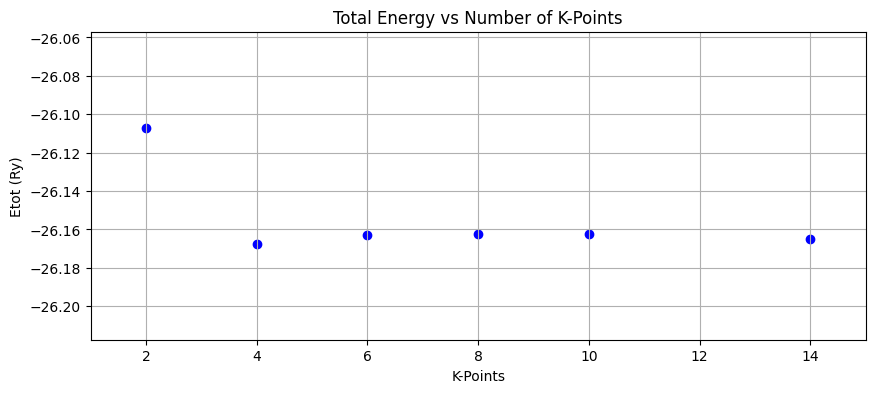

In [37]:
# Read the data from prefix.scf.kk.out
kk, etot = [], []

with open('LiB2.scf.kk.out', 'r') as file:
    for line in file:
        e, t = line.split(" ")
        kk.append(int(e.split(".")[2].split("-")[1]))
        etot.append(float(t))

kk, etot = zip(*sorted(zip(kk, etot)))


# Plotting
plt.figure(figsize=(10, 4))
plt.title('Total Energy vs Number of K-Points')
plt.scatter(kk, etot, marker='o', linestyle='-', color='b')

plt.xlabel('K-Points')
plt.ylabel('Etot (Ry)')
plt.grid(True)

plt.xlim(min(kk) - 1, max(kk) + 1)
plt.ylim(min(etot) - 0.05, max(etot) + 0.05)

plt.savefig('LiB2.scf.kk.png')
plt.show()

## Convergence on K-Points

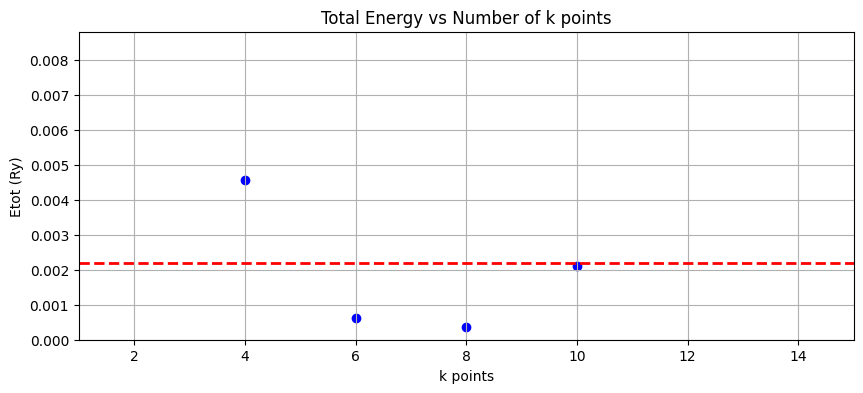

In [38]:
# Calculate Energy Differences
edelta = [abs(etot[i+1] - etot[i]) for i in range(len(kk) - 1)]

# Target energy
etarget = 0.0007349859 * 3

# Plotting
plt.figure(figsize=(10, 4))
plt.title('Total Energy vs Number of k points')
plt.scatter(kk[:-1], edelta, marker='o', linestyle='-', color='b')

plt.xlabel('k points')
plt.ylabel('Etot (Ry)')
plt.grid(True)

plt.xlim(min(kk) - 1, max(kk) + 1)
plt.ylim(0, 4 * etarget)

plt.axhline(y=etarget, color='r', linestyle='--', linewidth=2)

plt.savefig('LiB2.scf.ecut.png')
plt.show()

# Electronic States

In [39]:
# Fermi Energy (can be extracted from 'XX.nscf.out' QE output file)
Ef = 5.2849

## Band Structure

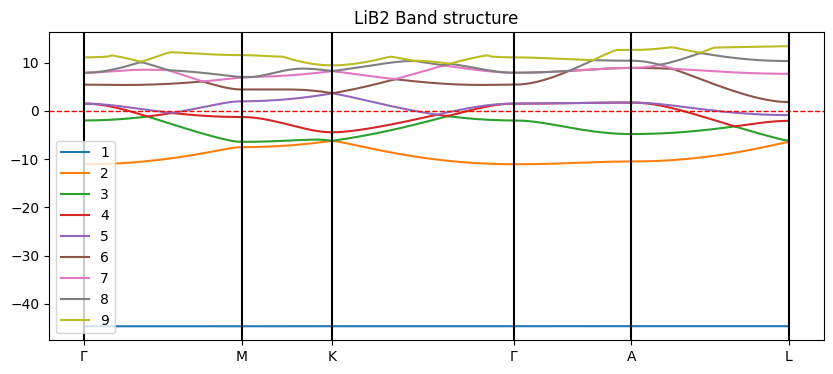

In [40]:
# Import bands data (two columns: position along x axis, energy (eV))
bands = np.loadtxt('LiB2.bands.dat.gnu')

# Extract position along x-axis 
labels = [r'$\Gamma$', "M", "K", r'$\Gamma$', "A", "L"]

# Number of bands and number of steps between each two points (in 'XX.bands.in') 
num_bands = 9
num_steps = 40

# Calculate auxiliary variables
num_kpoints = len(labels)
num_pts = (num_kpoints - 1) * num_steps + 1
posx = bands[:num_pts:num_steps, 0]

# Create the Figure
plt.figure(figsize=(10, 4))
plt.title('LiB2 Band structure')

plt.xticks(posx, labels)
for i in range(9):
    plt.plot(bands[:num_pts, 0], bands[i*num_pts:(i+1)*num_pts, 1] - Ef, label = i+1)
    plt.legend()

# plt.ylim([-10-5.4557,20-5.4557])
# plt.ylim([-0.75,.75])

plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
for l in posx:
    plt.axvline(l, color="k")

## Density of States

Calculated number of electrons: 8.993


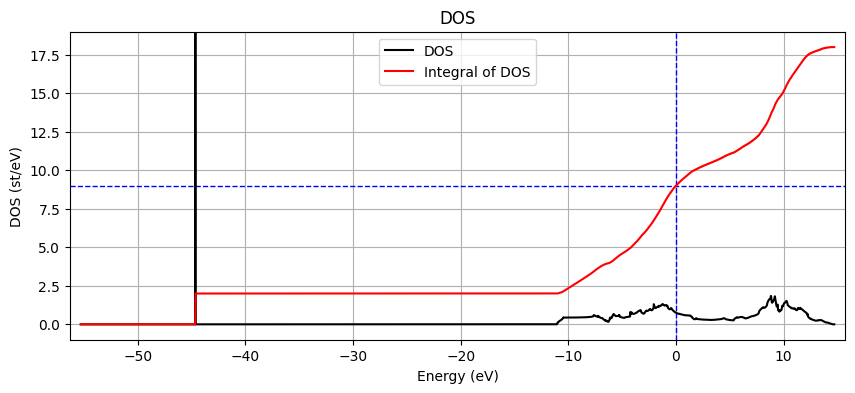

In [41]:
# Import dos data (three columns: energy (eV), dos (states/eV), IDOS (states))
dos = np.loadtxt('LiB2.dos')

# Shift by the Fermi Energy
dos[:, 0] = dos[:, 0] - Ef

# Find where IDOS intersects the Fermi energy
index = list(np.abs(dos[:, 0])).index(min(np.abs(dos[:, 0])))
nelec = dos[:, 2][index]

print(f"Calculated number of electrons: {nelec}")

# Create the Figure
plt.figure(figsize=(10, 4))
plt.title('DOS')

plt.axvline(x=0, color='b', linestyle='--', linewidth=1)
plt.axhline(y=nelec, color='b', linestyle='--', linewidth=1)

# Shift all energies by Fermi energy (Make sure the values for bands and DOS are consistent!)
plt.plot(dos[:, 0], dos[:, 1], color = 'k', label="DOS")
plt.plot(dos[:, 0], dos[:, 2], color = 'r', label="Integral of DOS")
plt.legend()

plt.xlabel('Energy (eV)')
plt.ylabel('DOS (st/eV)')
plt.grid(True)

plt.xlim(np.min(dos[:, 0]) - 1, np.max(dos[:, 0]) + 1)
plt.ylim(np.min(dos[:, 2:]) - 1, np.max(dos[:, 2:]) + 1)

plt.savefig('LiB2.dos.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()